In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/titanic/train.csv')

print(df.shape)  # rows:891, columns:12

print(df.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
# check if na in the data or not
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# check if the PassengerId is unique
print(np.unique(df['PassengerId'].values).size)

891


* np.where是NumPy中一個常用的函數，可以根據條件返回相應的元素下標或數值
* numpy.where(condition[, x, y])

In [11]:
df = df.set_index('PassengerId')

# 當 Sex 值為 female 則設為 1，反之為 0
df['SexCode'] = np.where(df['Sex'] == 'female', 1, 0)
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  SexCode  
PassengerId                                                                   
1                1      0         A/5 21171   7.2

In [14]:
print(df.isnull().sum())
print('-----------------------------')
print(df['Age'].isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
SexCode       0
dtype: int64
-----------------------------
177


In [15]:
# Age 我們可以使用現有資料的年齡平均數來補齊，讓資料分析更為方便

avg_age = df['Age'].mean()

df['Age'] = df['Age'].fillna(avg_age)
print(df['Age'].isnull().sum())

0


In [16]:
df.groupby('Sex')['Age'].size()

Sex
female    314
male      577
Name: Age, dtype: int64

In [17]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [18]:
# 當 Survived 值為 0 則設為 1，反之為 0
df['Died'] = np.where(df['Survived'] == 0, 1, 0)
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  SexCode  \
PassengerId                                                                    
1                1      0         A/5 21171   7

        Survived  Died
Sex                   
female       233    81
male         109   468


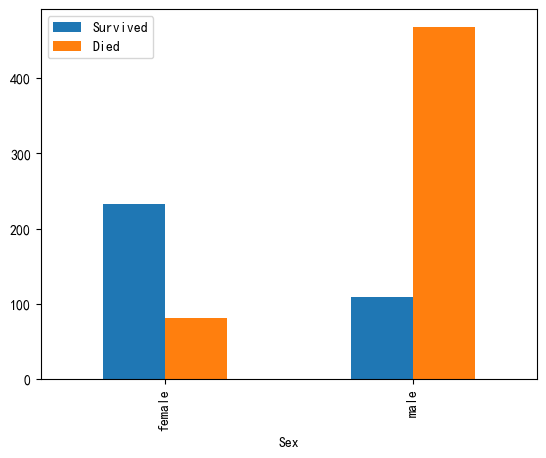

In [19]:
df_group_by_sex = df[['Survived', 'Died']].groupby(df['Sex']).sum()
print(df_group_by_sex)

df_group_by_sex.plot(kind='bar')
plt.show()

        Survived      Died
Sex                       
female  0.742038  0.257962
male    0.188908  0.811092


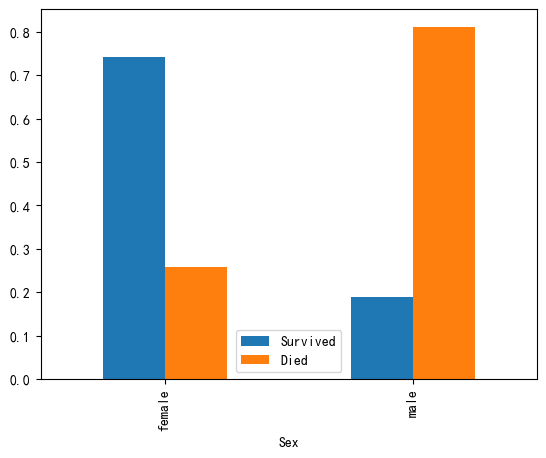

In [20]:
df_group_by_sex = df[['Survived', 'Died']].groupby(df['Sex']).mean()
print(df_group_by_sex)
df_group_by_sex.plot(kind='bar')
plt.show()

        Survived  Died
Pclass                
1            136    80
2             87    97
3            119   372


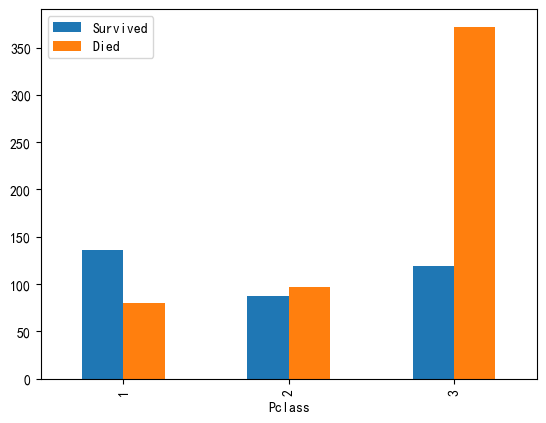

In [22]:
df_group_by_pclass = df[['Survived', 'Died']].groupby(df['Pclass']).sum()
print(df_group_by_pclass)
df_group_by_pclass.plot(kind='bar')
plt.show()

        Survived      Died
Pclass                    
1       0.629630  0.370370
2       0.472826  0.527174
3       0.242363  0.757637


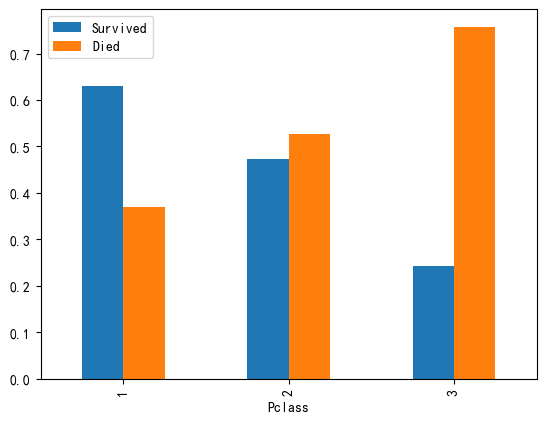

In [23]:
df_group_by_pclass = df[['Survived', 'Died']].groupby(df['Pclass']).mean()
print(df_group_by_pclass)
df_group_by_pclass.plot(kind='bar')
plt.show()

In [24]:
# 由於欄位較多，我們僅取出認為比較有可能會和 Survived 有關的屬性欄位
df[['Survived', 'Age', 'Pclass', 'Fare', 'SexCode']].corr()
# 一般研究者認為，相關係數絕對值 0.3 以下為低相關，0.3 ~ 0.7為中等相關，0.7 以上為高度相關

,Survived,Age,Pclass,Fare,SexCode
Survived,1.000000,-0.069809,-0.338481,0.257307,0.543351
Age,-0.069809,1.000000,-0.331339,0.091566,-0.084153
Pclass,-0.338481,-0.331339,1.000000,-0.549500,-0.131900
Fare,0.257307,0.091566,-0.549500,1.000000,0.182333
SexCode,0.543351,-0.084153,-0.131900,0.182333,1.000000


In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

distances = np.array([3.5, 4.7, 0.6, 3.9, 0.8, 0.5])
prices = np.array([40, 34, 70, 39, 62, 55])

X = pd.DataFrame(distances, columns=['distances'])
y = pd.DataFrame(prices, columns=['prices'])['prices']

# create LinearRegression object
linear_reg = LinearRegression()

linear_reg.fit(X, y)

# new dataframe
new_distances = pd.DataFrame(np.array([1.3, 4.2]), columns=['distances'])

predicted_prices = linear_reg.predict(new_distances)
print(predicted_prices)

[57.35110294 36.72058824]


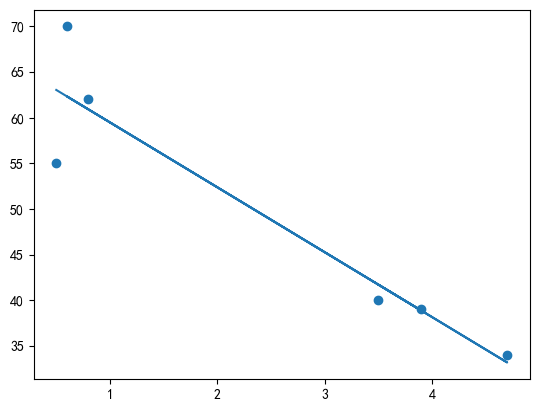

In [31]:
plt.scatter(distances, prices)

reg_prices = linear_reg.predict(X)

plt.plot(distances, reg_prices)

plt.show()